In [1]:
from itertools import cycle
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator
from mpltools import annotation

plt.style.use('seaborn-poster')

In [2]:
!ls

convplot.ipynb		       results_lsh_full__tri_errors
conv_result		       results_lsh_lambda__quad_errors
nohup.out		       results_lsh_lambda__tri_errors
quad_deg1.png		       results_lsh_mass__quad_errors
quad_deg2.png		       results_lsh_mass__tri_errors
quad_deg3.png		       results_lsh__quad_errors
quad_deg4.png		       results_lsh__tri_errors
results_clsq__quad_errors      tri_deg1.png
results_clsq__tri_errors       tri_deg2.png
results_dls__quad_errors       tri_deg3.png
results_dls__tri_errors        tri_deg4.png
results_lsh_full__quad_errors


In [3]:
degree = 4
result_cases_dirname_list = {
    "clsq": "results_clsq__quad_errors",
    "dls": "results_dls__quad_errors",
    "lsh_full": "results_lsh_full__quad_errors",
    "lsh_lambda": "results_lsh_lambda__quad_errors",
    "lsh_mass": "results_lsh_mass__quad_errors",
    "lsh": "results_lsh__quad_errors"
}

# result_cases_dirname_list = {
#     "clsq": "results_clsq__tri_errors",
#     "dls": "results_dls__tri_errors",
#     "lsh_full": "results_lsh_full__tri_errors",
#     "lsh_lambda": "results_lsh_lambda__tri_errors",
#     "lsh_mass": "results_lsh_mass__tri_errors",
#     "lsh": "results_lsh__tri_errors"
# }

def read_convergence_results(result_cases_dirname_list, degree, convert=True, original_base=2, new_base=10):
    results_dict = dict()
    for case in result_cases_dirname_list:
        dirname = result_cases_dirname_list[case]
        result_case = np.loadtxt("./%s/errors_degree%i.dat" % (dirname, degree))
        
        if convert:
    
            if original_base <= 0 and new_base <= 0:
                raise ValueError("Invalid log base.")
    
            result_case = original_base ** result_case
            result_case = np.log(result_case) / np.log(new_base)
        
        result_case_dict = {
            'mesh_size': result_case[:, 0],
            'scalar_error': result_case[:, 1],
            'flux_error': result_case[:, 2],
        }
        
        results_dict[case] = result_case_dict
    
    return results_dict

result_conv_log10 = read_convergence_results(result_cases_dirname_list, degree)
    
result_conv_log10

{'clsq': {'mesh_size': array([1.        , 1.17609126, 1.30103   , 1.39794001, 1.47712125,
         1.54406804]),
  'scalar_error': array([-5.95067943, -6.82399938, -7.44434212, -7.9260795 , -8.32004059,
         -8.65335963]),
  'flux_error': array([-4.89070466, -5.76875447, -6.39257863, -6.87670917, -7.27237566,
         -7.60696054])},
 'dls': {'mesh_size': array([1.        , 1.17609126, 1.30103   , 1.39794001, 1.47712125,
         1.54406804]),
  'scalar_error': array([-5.69870263, -6.61191502, -7.29397615, -7.72629899, -8.01629612,
         -7.70369366]),
  'flux_error': array([-3.76850123, -4.59047461, -5.20760099, -5.70158455, -6.11227871,
         -6.45545035])},
 'lsh_full': {'mesh_size': array([1.        , 1.17609126, 1.30103   , 1.39794001, 1.47712125,
         1.54406804]),
  'scalar_error': array([-5.91823759, -6.82170568, -7.45318463, -7.94059886, -8.33796548,
         -8.67351998]),
  'flux_error': array([-4.10272791, -4.99433636, -5.62206623, -6.10660063, -6.50095735,
  

/home/volps/firedrake/lib/python3.7/site-packages/mpltools/annotation/_slopemarker.py:128: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(verts, **poly_kwargs)


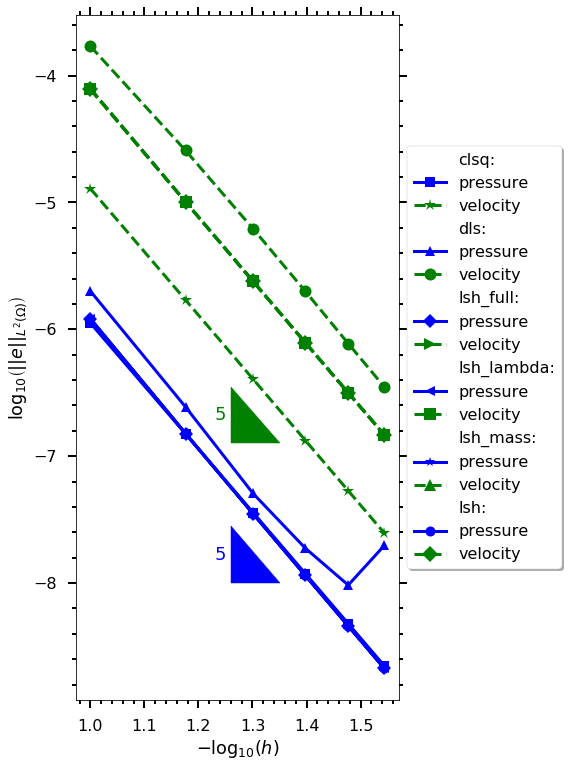

In [4]:
def plot_convergence_rate(
    results_dict,
    degree,
    origin_slope_scalar=(1.35, -2.25),
    origin_slope_flux=(1.35, -1.4),
    save_plot=False,
    file_to_save='',
    dir_to_save='',
    figure_extension='png',
    display_plot=True,
    high_quality=False,
    size_frac=0.2,
    figsize=(8, 10)
):
    if high_quality:
            fig, ax = plt.subplots(figsize=figsize, dpi=500)
    else:
        fig, ax = plt.subplots(figsize=figsize)

    cycle_colors = cycle('bgrcmk')
    color_scalar = next(cycle_colors)
    color_flux = next(cycle_colors)
    markers = cycle(('s', '*', '^', 'o', 'D', '>', '<')) 
    for case in results_dict:
        mesh_size = results_dict[case]["mesh_size"]
        scalar_error = results_dict[case]["scalar_error"]
        flux_error = results_dict[case]["flux_error"]

        marker_scalar = next(markers)
        ax.plot([np.nan], [np.nan], '', color='w', label='%s:' % case)
        ax.plot(
            mesh_size, 
            scalar_error,
            linestyle="-",
            marker=marker_scalar,
            color=color_scalar,
            markersize=10,
            linewidth=3,
            label="pressure"
        )

        marker_flux = next(markers)
        ax.plot(
            mesh_size, 
            flux_error,
            linestyle="--",
            marker=marker_flux,
            color=color_flux,
            markersize=12,
            linewidth=3,
            label="velocity"
        )
        
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              fancybox=True, shadow=True)
    
    plt.xlabel(r"$-\log_{10}( h )$")
    plt.ylabel(r"$\log_{10}\left(||e||_{L^2(\Omega)}\right)$")

    ax.tick_params(which='both', top=True, right=True)
    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)

    slope_value = degree + 1
    blue_x, blue_y = origin_slope_flux
    red_x, red_y = origin_slope_scalar
    annotation.slope_marker(
        origin=(red_x, red_y), 
        slope=-slope_value, 
        invert=True, 
        size_frac=size_frac, 
        pad_frac=0.1, 
        text_kwargs={
            'fontsize': 18,
            'text': slope_value,
            'color': color_scalar
        },
        poly_kwargs={
            'color': color_scalar,
            'alpha': 1
        },
        ax=ax
    )

    # slope_value = 2
    annotation.slope_marker(
        origin=(blue_x, blue_y), 
        slope=-slope_value, 
        invert=True, 
        size_frac=size_frac, 
        pad_frac=0.1, 
        text_kwargs={
            'fontsize': 18,
            'text': slope_value,
            'color': color_flux
        },
        poly_kwargs={
            'color': color_flux,
            'alpha': 1
        },
        ax=ax
    )

    plt.tight_layout()
    if save_plot:
        if dir_to_save == '':
            dir_to_save = './conv_result'

        os.makedirs(dir_to_save, exist_ok=True)

        if file_to_save == '':
            file_to_save = 'plot_conv_%i' % degree

        file_to_save = file_to_save + (".%s" % figure_extension)
        plt.savefig(file_to_save, bbox_inches='tight')

    if display_plot:
        plt.show()
        
    return


# filename = 'tri_deg%i' % degree
filename = 'quad_deg%i' % degree
plot_convergence_rate(
    result_conv_log10, 
    degree,
    origin_slope_scalar=(1.35, -8),
    origin_slope_flux=(1.35, -6.9),
    file_to_save=filename,
    size_frac=0.15,
    save_plot=True
)